# Data Analysis with Python (Pandas)

---

<img src="https://viezeliedjes.files.wordpress.com/2014/09/kbmarskramersceptisch.jpg?w=982&h=760" align="right" width=250/>In the Data Science community, Python is well known for its excellent data manipulation capabilities (e.g. matrix handling). In this chapter, we will review a number of vital external libraries in this respect (numpy, pandas), which allow scholars to load, manipulate and analyze tabular data. As example data, we will work with data from the [Meertens Tune Collection](http://www.liederenbank.nl/mtc/). We will work with the MTC-FS dataset which consists of 4120 digitally encoded vocal folk songs both from *Onder de groene linde* (2503) and from various related written sources (1617).

In this chapter, we will show you some of the basic plotting functionality available in Python. The plots can be embedded in the notebooks by executing the following cell:

In [1]:
%matplotlib inline

The default colors of matplotlib are not the most pretty ones. We can change that using:

In [2]:
import matplotlib
matplotlib.style.use('ggplot')

This chapter will introduce you to the basics of the Python Data Analysis Library **Pandas**. The library is very well documented and contains about all the fuctionality you need to work with tabular data and time-indexed data. We begin with importing the library into the Python workspace:

In [3]:
import pandas as pd

## Reading Data from a csv / excel file 

Pandas provides a simple method to read CSV files. To read the metadata file of the Meertens Tune Collection, execute the following cell:

In [ ]:
df = pandas.read_csv("data/MTC-FS.csv")  # returns an (R-like) dataframe

`pandas.read_csv` returns a `DataFrame` object, which is one of the most important data structures in Pandas. Let's have a look at this data structure:

In [ ]:
df

The IPython notebooks work seamlessly with Pandas and display a nicely formatted HTML table. We can access the first, say, 5 rows of this table using a slicing operation:

In [ ]:
df[:5]

An equivalent, yet slightly better understandable method is to use the `.head` method:

In [ ]:
y = 0
for x in df.values:
    while y < 10:
        print(x)
        y+=1

By default `.head` returns the first 5 rows of a DataFrame. The method takes one optional argument `n` with which you can specify how many rows to show:

In [ ]:
df.head(n=10)

The `pandas.read_csv` method takes many optional arguments that allow you to parse all kinds of CSV files (e.g. with different encodings, missing values, different separators etc.). One of the columns in our dataframe contains the date of the recordings. By default, Pandas will parse those columns as string objects. We can specify which columns should be parsed as dates using the following statement:

In [5]:
df = pd.read_csv("data/MTC-FS.csv", parse_dates=['date_of_recording'])

Remember, to quickly access the documentation of a method or function, you can use a question mark, as in:

In [ ]:
pandas.read_csv?

Since we will be using many functions such as `.read_csv` it would be convenient not having to type `pandas` all the time. Python allows you to import libraries using an alias, as in:

In [ ]:
import pandas as pd

Now we can use `pd.read_csv` instead of `pandas.read_csv`:

In [4]:
df = pd.read_csv("data/MTC-FS.csv", parse_dates=['date_of_recording'])

## Accessing Rows & Columns

Pandas DataFrames work much like regular Python dictionaries. You can retrieve the contents of a column as follows:

In [ ]:
type(df['tunefamily']) # pandas.core.series.Series

If the column name does not contain any spaces, Pandas will turn the column name into an attribute of the DataFrame which can be accessed as follows:

In [ ]:
type(df.tunefamily) # same

To access a particular row of a DataFrame, Pandas specifies to use the method `.ix`, as in:

In [ ]:
df.ix[0]

---

#### Q1

Write some code that shows the contents of another column. Tip: you can use `df.columns` to see which column names are available. 

In [ ]:
# insert your code here
df.columns
#df['place_of_recording']
df.place_of_recording
#print('####')
#df.ix[1] # row

We have seen the method `.head`. What would be the equivalent method to show the *n* last rows of a DataFrame? Hint: think of a dog. Try printing the *n=20* last rows.

In [ ]:
# insert your code here
df.tail(n=5)

---

## Selecting Multiple Columns

Pandas allows you to conveniently select multiple columns in a DataFrame. The syntax is the same as with a single column, but here we provide a list of the columns we want to retrieve:

In [ ]:
df[['tunefamily', 'title']] # new dataframe


These objects are reduced DataFrames that behave exactly the same as the orginal DataFrame. We can slice them as follows:

In [ ]:
df[['tunefamily', 'title']].head()

Or we first slice the DataFrame and then select the columns we're interested in:

In [ ]:
df[:5][['tunefamily', 'title']]

## Counting discrete variables

Most columns in the MTC dataset are categorical. Pandas provides the convenient method `.value_counts` which returns how often a particular value of a column occurs. Let's see that in action:

In [ ]:
df.tunefamily.head()

As you can see, the column tunefamily contains many duplicates. We would like to obtain a frequency distribution of the tune families in the collection. This can be easily done using:

In [ ]:
df.tunefamily.value_counts()

To print only the *n* most frequent tune families, we can use:

In [ ]:
df.tunefamily.value_counts()[:10]

It gets even better. We can plot these frequency distributions by simply adding `.plot`!

In [ ]:
df.tunefamily.value_counts()[:10].plot(kind='bar')
#df.tunefamily.value_counts()[:10].plot(kind='hist')


In [ ]:
df.tunefamily.value_counts()[:10].plot()

---

#### Q2

Make a bar plot showing the 10 most frequent places where recordings have been made.

In [ ]:
# insert your code here
df.columns
df.place_of_recording.value_counts().head(n=10).plot(kind='bar')
#

Make a density plot of the place name frequency distribution. Tip: search for 'density' at: http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [ ]:
# insert you code here
df.columns
df.place_of_recording.value_counts().plot(kind='kde')

---

The method `.value_counts` returns an object which is called a `Series` in pandas. DataFrames consist of columns which are Series objects. `Series` have many methods available, such as the `.plot` method. Other methods are: `.sum`, `.mean`, `.median` etc:

In [ ]:
# columns are Series
tune_counts = df.tunefamily.value_counts()
print(type(tune_counts))
print(tune_counts.sum())
print(tune_counts.mean())
print(tune_counts.median())
tune_counts.t # nice

To get a quick summary of a Series object, use the method `.describe`:

In [ ]:
tune_counts.describe()

---

#### Q3

In the next cell, place your cursor behind the dot and hit TAB to retrieve an overview of the many methods available.

In [ ]:
tune_counts.

Write a line of code which computes the cumulative sum of `tune_counts` and plots it as a line plot. A cumulative sum is a series of partial sums over a given sequence, rather than just the final number in that series (which would be the regular sum).

In [ ]:
# insert your code here
tune_counts.cumsum().plot() # nice...

## Data selection under conditions

Often we are interested in particular rows of a dataframe that satisfy particular conditions. We might be interested in all recordings that were made in Groningen for example, or all recordings before 1980. In the previous chapters you have written a lot of code that involved looping over an iterable and depending on whether some condition held, append each item in that iterable to a new list. In Pandas people generally avoid looping and prefer to use so-called vectorized operations that take care of the looping internally.

Say we are interested in all records of which the tune family is equal to `Die schuintamboers 1`. Normally we would write a loop, such as:

    results = []
    for row in df:
        if row.tunefamily == 'Drie schuintamboers 1':
            results.append(row)
    print(results)

(Note that the above code will not actually work, because of the way DataFrames are structured and looped over, but it shows a standard looping approach). In Pandas you can achieve the same thing (and better!) by using the following single line:

In [ ]:
df[df.tunefamily == 'Drie schuintamboers 1'] # select all rows where tunefamily is eq to 'title' -- returns a dataframe

In [ ]:
stuff

Let's break that statement down. The inner statement `df.tunefamily == 'Drie schuintamboers 1'` tests for each item in the column `tunefamily` whether it is equal to `'Drie schuintamboers 1'`. When we execute that seperately, Python returns a Series object with boolean values that are either `True` (if it was a match) or `False` (if the item didn't match):

In [ ]:
df.tunefamily == 'Drie schuintamboers 1'

When we *index* our `df` with this Series object, we get just the rows where the condition holds.

---

#### Q4

Write a line of code that returns a new dataframe in which all recordings are from Groningen.

In [ ]:
# insert your code here
df[df.place_of_recording == "Groningen"]

What is the tunefamily that is most often attested in Amsterdam? (Tip: remember the value_counts method you can call on (filtered) DataFrames. Also, Series objects have a method called `argmax` that returns the argument corresponding to a maximum value.)

In [ ]:
# insert your code here
df[df.place_of_recording == "Amsterdam"].tunefamily.value_counts().argmax() # without the parentheses this returns a 
                                                                            # dataframe

---

We can easily select data on the basis of multiple conditions. Here is an example:

In [ ]:
in_Assen = df.place_of_recording == 'Assen'
is_Suze = df.tunefamily == 'Suze mien lam'
#df[in_Assen & is_Suze]
df[(df.place_of_recording == 'Assen') & (df.tunefamily == 'Suze mien lam')]

Just to show you that the returned object is another DataFrame, we select two columns to construct a reduced DataFrame:

In [ ]:
df[in_Assen & is_Suze][['filename', 'place_of_recording']]

---

#### Q5

When we look at all values in `df.place_of_recording` we notice that many values are missing (NaN values). 

In [ ]:
df.place_of_recording

We can use the method `.isnull` (e.g. on a column) to select all items that are NaN. Similarly, the method `.notnull` is to select all items that are not NaN. Write a line of code that returns a new DataFrame in which for all records the place of recording is known.

In [ ]:
# insert your code here
placename_df = df[df.place_of_recording.notnull()] # use the square brackets to construct a dataframe
placename_df

---

## TimeSeries

Pandas is a library with tremendous functionality for tabular data. Another key feature of the library is the way it can work with time series. The MTC contains a column `date_of_recording` which provides for most but not all items the date at which the recording was made. In the following analyses, we would like to work with data for which the date of recording is known. We create the corresponding DataFrame as follows:

In [5]:
df = df[df.date_of_recording.notnull()]

To conveniently work with time series, we set the index of the dataframe (i.e. the labels of the rows) to hold the contents of the column `date_of_recording`. Note that after this operation, the column `date_of_recording` is no longer part of the dataframe but only as an index.

In [6]:
df = df.set_index("date_of_recording")

In [ ]:
df.head()

The Index of our new `df` is now of the type `DatetimeIndex`. (If not, the CSV was not read in with the argument `parse_dates=['date_of_recording']`)

In [ ]:
type(df.index)

This data structure provides a vast amount of methods and functions to manipulate and index the data. For example, we can retrieve the year of each recording as follows:

In [ ]:
df.index.year

Or the day:

In [ ]:
df.index.day

Or the week:

In [ ]:
type(df.index)

---

#### Q6

Write a single line of code which returns a new DataFrame consisting of all recordings made at January first (independent of the year). Tip: type `df.index.` followed by TAB to scan through an overview of all the available methods.

In [17]:
# insert your code here
df[df.index.dayofyear == 1] # == df.index.is_year_start

,filename,songid,source_id,serial_number,page,singer_id_s,place_of_recording,latitude,longitude,title,...,textfamily_id,tunefamily_id,tunefamily,type,voice_strophe_number,voice_strophe,image_filename_s,audio_filename,variation,confidence
date_of_recording,,,,,,,,,,,,,,,,,,,,,
1959-01-01,NLB072273_01,72273,1011179,19307,NaN,0525,Leeuwarden,53.208801,5.815124,NaN,...,27706,4041_2,Ik heb de groene straten 2,folksong,1,stanza,NLB72273_01.jpg|NLB72273_02.jpg|NLB72273_03.jp...,NLB072273_all.mp3,NaN,neutral
1959-01-01,NLB072273_02,72273,1011179,19307,NaN,0525,Leeuwarden,53.208801,5.815124,NaN,...,27706,4041_2,Ik heb de groene straten 2,folksong,2,stanza,NLB72273_01.jpg|NLB72273_02.jpg|NLB72273_03.jp...,NLB072273_all.mp3,NaN,neutral
1958-01-01,NLB072307_01,72307,1011179,19604,NaN,0543,Noordwijk aan Zee,52.243155,4.434829,NaN,...,6801,1507_5,Daar zou er een maagdje vroeg opstaan 5,folksong,1,stanza,NLB72307_01.jpg|NLB72307_02.jpg,NLB072307_all.mp3,NaN,neutral
1959-01-01,NLB072308_01,72308,1011179,19605a en b,NaN,0605,Rockanje,51.880142,4.058703,NaN,...,6801,1507_5,Daar zou er een maagdje vroeg opstaan 5,folksong,1,stanza,NLB72308_01.jpg|NLB72308_02.jpg,NLB072308_all.mp3,NaN,neutral
1959-01-01,NLB072308_02,72308,1011179,19605a en b,NaN,0605,Rockanje,51.880142,4.058703,NaN,...,6801,1507_5,Daar zou er een maagdje vroeg opstaan 5,folksong,2,stanza,NLB72308_01.jpg|NLB72308_02.jpg,NLB072308_all.mp3,NaN,neutral
1958-01-01,NLB072482_01,72482,1011179,20612,NaN,0563,Westkapelle,51.525747,3.437807,NaN,...,21312,9779_0,Het was laatst op een zomerdag,folksong,1,stanza,NLB72482_01.jpg|NLB72482_02.jpg,NLB072482_all.mp3,NaN,neutral
1975-01-01,NLB076106_01,76106,1011179,45201,NaN,1893,Nieuwlande (Dalen),52.720917,6.642440,NaN,...,20886,48_1,Aan de oever van een snelle vliet 1,folksong,1,stanza,NLB76106_01.jpg|NLB76106_02.jpg|NLB76106_03.jp...,NLB076106_all.mp3,NaN,neutral
1975-01-01,NLB076107_01,76107,1011179,45202,NaN,1893,Nieuwlande (Dalen),52.720917,6.642440,NaN,...,1108,9912_0,De elf officieren,folksong,1,stanza,NLB76107_01.jpg|NLB76107_02.jpg|NLB76107_03.jp...,NLB076107_all.mp3,variation,weak
1975-01-01,NLB076108_01,76108,1011179,45203,NaN,1893,Nieuwlande (Dalen),52.720917,6.642440,NaN,...,27706,9696_2,In Frankrijk buiten de poorten 2,folksong,1,stanza,NLB76108_01.jpg|NLB76108_02.jpg|NLB76108_03.jp...,NLB076108_all.mp3,NaN,neutral


---

## Add a column to a Dataframe

Pandas makes it really easy to add new columns to a DataFrame. In the following cell we add a column containing the week number at which the recording was made.

In [ ]:
df['week'] = df.index.week

In [ ]:
df.week[:10]

---

#### Q7

Add a column `year` to the DataFrame which contains for each record the year of recording.

In [ ]:
# insert your code here
df["year_of_recording"] = df.index.year
df.year_of_recording[:10]

---

## Grouping data

Often we would like to group our data on the basis of some criterium and perform operations on those groups. We could, for example, group all recordings on the basis of where they were recorded. Pandas provides the convenient (though sometimes challenging) method `.groupby`. It works as follows:

In [8]:
grouped = df.groupby('place_of_recording')

In [13]:
grouped.date_of_recording.value_counts()

place_of_recording                 date_of_recording
Aalten                             1963-02-26            2
Aarle-Rixtel                       1969-07-10            1
Alkmaar                            1961-08-04            1
                                   1967-06-13            1
                                   1970-04-14            1
Alphen (NB)                        1977-03-30            2
Altweerterheide                    1970-06-06            5
                                   1977-04-20            1
Ambt Delden                        1963-07-01            5
                                   1960-01-05            3
Amersfoort                         1969-01-23            2
Amsterdam                          1954-10-11           13
                                   1954-12-14            6
                                   1955-12-08            4
                                   1960-04-26            3
                                   1971-11-18            3
   

A `DataFrameGroupBy` object consists of several smaller DataFrames per group. We grouped the original dataframe on the key `place_of_recording` and therefore the `grouped` object contains a DataFrame for each unique place of recording. 

We can use the method `.size` to assess the size (i.e. number of records) of each group:

In [20]:
grouped.size()

place_of_recording
Aalten                                2
Aarle-Rixtel                          1
Alkmaar                               3
Alphen (NB)                           2
Altweerterheide                       6
Ambt Delden                           8
Amersfoort                            2
Amsterdam                            45
Amsterdam                             1
Anna Paulowna                         4
Annen                                 5
Apeldoorn                             2
Appingedam                            4
Arcen                                 4
Arnhem                                3
Assen                                47
Asten                                 1
Baexem                                1
Bakkum                               12
Balkbrug                              6
Ballum (Ameland)                      6
Barneveld                             1
Bedum                                 2
Beerta                                4
Beesel               

When we add the method `.sort_values` and specify that we want the sorting to be done in descending order we obtain the following Series:

In [21]:
grouped.size().sort_values(ascending=False)

place_of_recording
Hoorn (Terschelling)                   54
Assen                                  47
Amsterdam                              45
Volendam                               42
Emmen                                  39
Eindhoven                              37
Groningen                              35
Winschoten                             34
Helden                                 34
Buitenpost                             32
Ter Apel                               31
Muntendam                              30
Hoogkerk                               28
Milheeze                               26
Hardegarijp                            24
Braamberg (bij Slagharen)              24
Wagenborgen                            24
Tilburg                                24
Oost-Souburg                           23
Oldenzaal                              23
Enkhuizen                              23
Urk                                    22
Stadskanaal                            22
Koudekerke     

---

#### Q8

Just to recap, compute the max, min, mean, and median number of items per group.

In [34]:
# insert your code here
grouped.size().max()
grouped.size().min()
grouped.size().mean()
grouped.size().median()
grouped.size().describe()

count    431.000000
mean       5.786543
std        7.622543
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       54.000000
dtype: float64

---

Grouped objects are extremely helpful when we want to compute a frequency distribution for each unique item of a particular column. Say we would like to investigate the frequency distribution of tune families per place of recording. Given that we have created a grouped object with `place_of_recording` as key, all we need to do is the following:

In [9]:
grouped.tunefamily.value_counts()

place_of_recording  tunefamily                               
Aalten              Er reed er eens een ruiter 1                 2
Aarle-Rixtel        Ik ging laatstmaal eens uit wandelen         1
Alkmaar             Daar ging een heer 1                         1
                    Daar was laatst een meisje loos 1            1
Alphen (NB)         Aan de oever van een snelle vliet 1          1
                    Het vrijen is plezant 1                      1
Altweerterheide     Ik heb laatstmaal weer een wondere zaak 1    2
                    Er woonde een vrouwtje al over het bos       1
                    Ik was er een haasje 1                       1
                    Onlangs zijnde vol onrusten 3                1
Ambt Delden         Daar zou er een maagdje vroeg opstaan 1      2
                    Mijn vader zei laatst tegen mij              2
                    Femmes voulez-vous éprouver                  1
                    Ich bin der Doktor Eisenbart                 1


Let's make it slightly more complex. In the previous example we created a grouped object using a single key. We can also specify multiple keys, as in:

In [10]:
grouped = df.groupby(['place_of_recording', 'singer_id_s'])

This produces the following data structure:

In [11]:
grouped.tunefamily.value_counts()

place_of_recording  singer_id_s  tunefamily                               
Aalten              0621         Er reed er eens een ruiter 1                 2
Aarle-Rixtel        1553         Ik ging laatstmaal eens uit wandelen         1
Alkmaar             0433         Daar was laatst een meisje loos 1            1
                    0898         Daar ging een heer 1                         1
Alphen (NB)         1911|1912    Aan de oever van een snelle vliet 1          1
                                 Het vrijen is plezant 1                      1
Altweerterheide     1642         Ik heb laatstmaal weer een wondere zaak 1    2
                                 Ik was er een haasje 1                       1
                                 Onlangs zijnde vol onrusten 3                1
                    1922         Er woonde een vrouwtje al over het bos       1
Ambt Delden         1349         Daar zou er een maagdje vroeg opstaan 1      2
                                 Mijn vader z

---

#### Q9

Make a plot that visualizes for each year how many recordings were made. Tip: first create a grouped object.

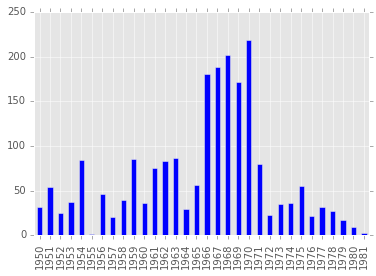

In [36]:
# insert your code here
grouped_year = df.groupby(df.index.year)
grouped_year.tunefamily.count().plot(kind='bar')

---

## String operations

One of my favourite functionalities of Pandas is the way it allows you to do vectorized string operations. These operations can be useful if you want to select particular string cells in your dataframe or when you want to manipulate / correct the data. Let's have a look at some of the string data in the MTC:

In [37]:
firstlines = df.firstline

In [46]:
firstlines[:10]

date_of_recording
1977-02-09         Hoe menig kind wordt tot het kwaad geboren
1977-02-09                      Er was eens een edelmans here
1977-02-09             Het was op een avond een avond zo laat
1977-02-09    Ik zal u gaan verhalen een kluchtje van fortuin
1977-02-09                 Mijne heren luistert naar dit lied
1977-08-12                    Ik ging er door malen en meilen
1977-08-12                  Constant een jeugdig jong matroos
1978-01-13             Hoort vrienden hoort al naar mijn lied
1978-01-13                        Er was eens een arme moeder
1978-01-13          Meisje waarom zijt gij zo vroeg opgestaan
Name: firstline, dtype: object

Now, `firstlines` is a Series corresponding to the firstline column, which contains strings. We can access the string methods of a column with `.str`. In the following cell, place your cursor after the last dot hit TAB:

In [47]:
firstlines.str.

SyntaxError: invalid syntax (<ipython-input-47-0e65c24f6582>, line 1)

As you can see, almost all regular string operations are available. The neat thing is that if you call a method like `.upper`, the method will be automatically applied to all items in the series (this is referred to as vectorized operations). Let's see that in action:

In [48]:
firstlines.str.lower().head()

date_of_recording
1977-02-09         hoe menig kind wordt tot het kwaad geboren
1977-02-09                      er was eens een edelmans here
1977-02-09             het was op een avond een avond zo laat
1977-02-09    ik zal u gaan verhalen een kluchtje van fortuin
1977-02-09                 mijne heren luistert naar dit lied
Name: firstline, dtype: object

The method `.contains` is particularly useful if you want to extract all strings that contain a particular substring. We could, for example, search for the string `boom` to extract all records that mention a tree in the first lines:

In [52]:
firstlines.str.contains('boom')

date_of_recording
1977-02-09    False
1977-02-09    False
1977-02-09    False
1977-02-09    False
1977-02-09    False
1977-08-12    False
1977-08-12    False
1978-01-13    False
1978-01-13    False
1978-01-13    False
1978-01-13    False
1978-03-02    False
1978-03-02    False
1978-01-27    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25     True
1950-03-25     True
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
              ...  
1979-06-22    False
1979-07-20    False
1979-12-10    False
1979-12-10    False
1979-12-10    False
1979-12-10    False
1979-12-10    False
1979-10-19    False
1979-10-19    False
1979-10-23    False
1979-10-23    False
1979-08-11    False
1979-08-11    False
1979-11-28    False
1979-11-28    False
1979-11-28    False
1980-12-01    False
1980-01-19    False
19

The method `.contains` returns a boolean series which we can use to index the dataframe:

In [43]:
df[firstlines.str.contains('boom')]

,filename,songid,source_id,serial_number,page,singer_id_s,place_of_recording,latitude,longitude,title,...,textfamily_id,tunefamily_id,tunefamily,type,voice_strophe_number,voice_strophe,image_filename_s,audio_filename,variation,confidence
date_of_recording,,,,,,,,,,,,,,,,,,,,,
1950-03-25,NLB070016_01,70016,1011179,00401,NaN,1017,Houtigehage,53.144910,6.136365,NaN,...,6801,9743_2,Een lindeboom stond in het dal 2,folksong,1,stanza,NLB70016_01.jpg|NLB70016_02.jpg,NLB070016_all.mp3,NaN,neutral
1950-03-25,NLB070016_02,70016,1011179,00401,NaN,1017,Houtigehage,53.144910,6.136365,NaN,...,6801,9743_2,Een lindeboom stond in het dal 2,folksong,2,stanza,NLB70016_01.jpg|NLB70016_02.jpg,NLB070016_all.mp3,NaN,neutral
1950-09-04,NLB070053_01,70053,1011179,01004,NaN,0759,Hoorn (Terschelling),53.406142,5.330574,NaN,...,2533,9722_1,Zolang de boom zal bloeien 1,folksong,1,stanza,NLB70053_01.jpg|NLB70053_02.jpg,NLB070053_all.mp3,NaN,neutral
1951-03-11,NLB070082_01,70082,1011179,01211,NaN,1041,Wagenborgen,53.256299,6.934971,NaN,...,2533,9722_2,Zolang de boom zal bloeien 2,folksong,1,stanza,NLB70082_01.jpg|NLB70082_02.jpg,NLB070082_all.mp3,NaN,neutral
1951-12-27,NLB070089_01,70089,1011179,01303,NaN,1043,Hengelo,52.271227,6.804533,NaN,...,6801,9743_1,Een lindeboom stond in het dal 1,folksong,1,stanza,NLB70089_01.jpg|NLB70089_02.jpg,NLB070089_all.mp3,NaN,neutral
1951-12-27,NLB070096_01,70096,1011179,01310,NaN,1043,Hengelo,52.271227,6.804533,NaN,...,2533,9722_1,Zolang de boom zal bloeien 1,folksong,1,stanza,NLB70096_01.jpg|NLB70096_02.jpg,NLB070096_all.mp3,NaN,neutral
1951-12-29,NLB070117_01,70117,1011179,01702,NaN,1053,Assen,52.998204,6.556922,NaN,...,8408,10024_0,Op een boom een koekoek,folksong,1,stanza,NLB70117_01.jpg|NLB70117_02.jpg,NLB070117_all.mp3,NaN,neutral
1951-12-28,NLB070141_01,70141,1011179,01815,NaN,1055,Braamberg (bij Slagharen),52.647931,6.524536,NaN,...,6801,9743_1,Een lindeboom stond in het dal 1,folksong,1,stanza,NLB70141_01.jpg|NLB70141_02.jpg,NLB070141_all.mp3,NaN,neutral
1952-12-20,NLB070293_01,70293,1011179,03820,NaN,0683|0687|0685|0682,Enkhuizen,52.706613,5.290436,NaN,...,8408,10024_0,Op een boom een koekoek,folksong,1,stanza,NLB70293_01.jpg|NLB70293_02.jpg,NLB070293_all.mp3,NaN,neutral


---

To give another example, let's search for all records of which the first line mentions the word `zomer` (summer):

In [53]:
is_summer = firstlines.str.contains('zomer')

In [54]:
is_summer

date_of_recording
1977-02-09    False
1977-02-09    False
1977-02-09    False
1977-02-09    False
1977-02-09    False
1977-08-12    False
1977-08-12    False
1978-01-13    False
1978-01-13    False
1978-01-13    False
1978-01-13    False
1978-03-02    False
1978-03-02    False
1978-01-27    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
1950-03-25    False
              ...  
1979-06-22    False
1979-07-20    False
1979-12-10    False
1979-12-10    False
1979-12-10    False
1979-12-10    False
1979-12-10    False
1979-10-19    False
1979-10-19    False
1979-10-23    False
1979-10-23    False
1979-08-11    False
1979-08-11    False
1979-11-28    False
1979-11-28    False
1979-11-28    False
1980-12-01    False
1980-01-19    False
19

As you can see, this returns a boolean Series object. Note that the original `DatetimeIndex` is still in place. We can use that to conveniently plot all occurrences over the years:

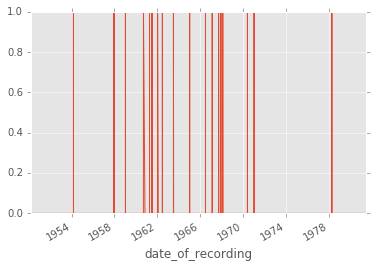

In [55]:
is_summer.plot()

When we index `firstlines` with `is_summer` we retrieve a new Series object consisting of all records that mention the word `zomer` in their first line:

In [56]:
summer_lines = firstlines[is_summer]
summer_lines

date_of_recording
1954-03-04    Het was op een schone zomerdag / Dat ik uit wa...
1957-12-15                            Op een mooien zomermorgen
1960-09-16                        Het was al op een zomermorgen
1961-04-11    Het was op een zomermorgen / Al in de maand va...
1962-06-23    Het was op een zoele zomerdag toen ik in het b...
1965-01-09    [Het was op] een schone zomerdag / Toen ik uit...
1958-01-01                       Het was laatst op een zomerdag
1962-01-11               Het was op een mooie zomerdag zomerdag
1963-07-05              Het was op een mooie zomerdag, zomerdag
1961-07-04                           Het was al op een zomerdag
1959-01-10                       Het was laatst op een zomerdag
1966-07-02    Het was op een zomeravond / Een meisje stond i...
1967-02-17                              Op een mooie zomeravond
1967-09-23                        Het was op een mooie zomerdag
1967-12-10                        Het was op een mooie zomerdag
1968-02-12            

---

#### Q10

Write some code that computes in which quarter of the year most songs about summer are recorded. Tip: use the `.index` attribute and a `Counter` object from the `collections` library.

In [61]:
# insert your code here
from collections import Counter

Counter(df.index.month).most_common()


AttributeError: 'numpy.ndarray' object has no attribute 'count'

---

## Exercises

You now should have a basic understanding of some important concepts in the Pandas library. The library contains many more interesting functions and methods and it takes quite some time to master them all. The best way to become more confident in using the library is by working with your own data and try to do some basic analyses. 

The following exercises are to give some more practice. Some problems will be tough, and you cannot always rely on the information provided in this chapter. This is something you'll have to get used to. Don't worry, visit the documentation website (see http://pandas.pydata.org/pandas-docs/version/0.17.0/), Google for particular problems or ask questions on the Slack channel. Asking for help is all part of learning a new library. 

In the following exercises we begin with working on the Dative alternation dataset of Bresnan et al. (2007). In English, the recipient can be realized either as an Noun Phrase (NP), *John gave Mary the book*, or as a Prepositional Phrase (PP), *John gave the book to Mary*. Bresnan et al. (2007) studied several factors that influence the realization of the dative. The complete dataset of Bresnan et al. (2007) is included in the `data` directory under `data/dative.csv`.

Use Pandas to read the dataset as a DataFrame:

In [65]:
dtv = pd.read_csv('data/dative.csv')

Inspect the first 10 lines of the dataframe:

In [66]:
dtv.head()


,ID,Speaker,Modality,Verb,SemanticClass,LengthOfRecipient,AnimacyOfRec,DefinOfRec,PronomOfRec,LengthOfTheme,AnimacyOfTheme,DefinOfTheme,PronomOfTheme,RealizationOfRecipient,AccessOfRec,AccessOfTheme
0,1,NaN,written,feed,t,1,animate,definite,pronominal,14,inanimate,indefinite,nonpronominal,NP,given,new
1,2,NaN,written,give,a,2,animate,definite,nonpronominal,3,inanimate,indefinite,nonpronominal,NP,given,new
2,3,NaN,written,give,a,1,animate,definite,nonpronominal,13,inanimate,definite,nonpronominal,NP,given,new
3,4,NaN,written,give,a,1,animate,definite,pronominal,5,inanimate,indefinite,nonpronominal,NP,given,new
4,5,NaN,written,offer,c,2,animate,definite,nonpronominal,3,inanimate,definite,nonpronominal,NP,given,new


The dataset provides for each entry the verb that was used. Create a Series object that counts how often each verb is used:

In [69]:
verb_fr = dtv.Verb.value_counts()

Plot the ten most frequent verbs as a pie chart:

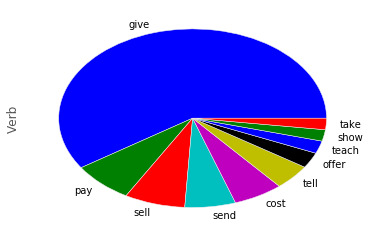

In [73]:
verb_fr.nlargest(10).plot(kind='pie')

The realization of the recipient (NP or PP) is stored in the column `RealizationOfRecipient`. How many NP realizations are there and how many PP realizations?

In [102]:
 dtv.RealizationOfRecipient.value_counts()


NP    2414
PP     849
Name: RealizationOfRecipient, dtype: int64

The recipients can be either animate or inanimate. How many PP realizations are inanimate? Tip: use `pd.crosstab`.

In [116]:

animacy_ctab = pd.crosstab(dtv.RealizationOfRecipient, dtv.AnimacyOfRec)

Make a single bar plot that visualizes for both PP and NP realizations of the recipient how often they are animate or inanimate. Tip: use the crosstab method of the previous exercise.

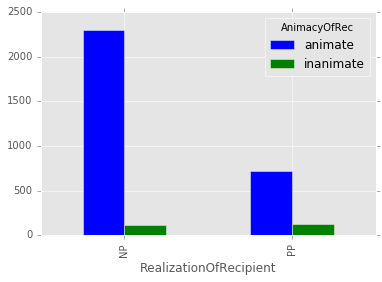

In [117]:
animacy_ctab.plot(kind='bar')

Sometimes it is convenient to sort a dataframe on a particular column. Write some code that sorts the `dative` dataframe on the realization of the recipient.

In [132]:
dtv_realization = dtv.set_index('RealizationOfRecipient').sort_index()
dtv_realization

,ID,Speaker,Modality,Verb,SemanticClass,LengthOfRecipient,AnimacyOfRec,DefinOfRec,PronomOfRec,LengthOfTheme,AnimacyOfTheme,DefinOfTheme,PronomOfTheme,AccessOfRec,AccessOfTheme
RealizationOfRecipient,,,,,,,,,,,,,,,
NP,1,NaN,written,feed,t,1,animate,definite,pronominal,14,inanimate,indefinite,nonpronominal,given,new
NP,2050,S1028,spoken,give,t,1,animate,definite,pronominal,3,animate,indefinite,nonpronominal,given,given
NP,2051,S1028,spoken,give,a,1,animate,definite,pronominal,2,inanimate,definite,nonpronominal,given,accessible
NP,2052,S1056,spoken,cost,p,4,animate,definite,nonpronominal,1,inanimate,indefinite,nonpronominal,given,accessible
NP,2054,S1249,spoken,give,t,1,animate,definite,pronominal,30,inanimate,indefinite,nonpronominal,given,new
NP,2055,S1257,spoken,loan,t,1,animate,definite,pronominal,1,inanimate,indefinite,nonpronominal,given,accessible
NP,2060,S1121,spoken,cost,p,1,animate,definite,pronominal,1,inanimate,indefinite,pronominal,given,accessible
NP,2061,S1121,spoken,send,t,1,animate,definite,pronominal,4,inanimate,indefinite,nonpronominal,given,accessible
NP,2062,S1264,spoken,send,t,1,animate,definite,pronominal,4,inanimate,indefinite,nonpronominal,given,accessible


Now sort the data on the length of the recipient in **descending** order:

In [134]:
dtv.set_index(dtv.LengthOfRecipient).sort_index(ascending=False)


,ID,Speaker,Modality,Verb,SemanticClass,LengthOfRecipient,AnimacyOfRec,DefinOfRec,PronomOfRec,LengthOfTheme,AnimacyOfTheme,DefinOfTheme,PronomOfTheme,RealizationOfRecipient,AccessOfRec,AccessOfTheme
LengthOfRecipient,,,,,,,,,,,,,,,,
31,636,NaN,written,give,a,31,inanimate,indefinite,nonpronominal,2,inanimate,indefinite,nonpronominal,PP,new,new
23,870,NaN,written,give,a,23,inanimate,definite,nonpronominal,1,inanimate,indefinite,nonpronominal,PP,new,accessible
22,824,NaN,written,deal,a,22,inanimate,definite,nonpronominal,3,inanimate,indefinite,nonpronominal,PP,new,new
22,804,NaN,written,give,a,22,inanimate,definite,nonpronominal,2,inanimate,indefinite,nonpronominal,PP,accessible,accessible
20,712,NaN,written,sell,t,20,animate,indefinite,nonpronominal,1,inanimate,definite,nonpronominal,PP,new,given
17,419,NaN,written,give,a,17,animate,definite,nonpronominal,12,inanimate,indefinite,nonpronominal,NP,given,accessible
17,563,NaN,written,give,a,17,animate,indefinite,nonpronominal,4,inanimate,indefinite,nonpronominal,PP,accessible,new
17,670,NaN,written,give,a,17,inanimate,definite,nonpronominal,6,inanimate,indefinite,nonpronominal,PP,new,accessible
15,846,NaN,written,sell,t,15,animate,definite,nonpronominal,3,inanimate,definite,nonpronominal,PP,new,new


Write some code that prints the mean length of the recipient for both animate and inanimate recipients.

In [ ]:
# insert your code here

Make a boxplot that visualizes for each realization of the recipient (i.e. NP or PP) the length of the theme. Tip: make use of the method `dative.boxplot`.

In [ ]:
# insert your code here